In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../artifacts/Food_Reviews_new.csv")

In [3]:
data.head()

,Score,Type,Label,Text,Summary
0,5,good,1,I can't believe I am the first to review this ...,A Great Product!!!
1,5,good,1,You can find this 6-pack for $40 dollars less ...,BUY ELSEWHERE
2,5,good,1,Our 9 month old originally was spitting up a l...,Best Organic milk out there..my baby switched ...
3,5,good,1,"When my daughter was an infant, she was allerg...",We are a fan
4,5,good,1,"I love pasta, but it does not love me. I just...",Absolutely awesome!


## Data Preprocessing

In [4]:
data.shape

(9999, 5)

In [5]:
data.duplicated().sum()

551

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Score      0
Type       0
Label      0
Text       0
Summary    0
dtype: int64

In [9]:
data.shape

(9448, 5)

## Text Preprocessing

In [10]:
import re
import string

In [11]:
data["Summary"].head(5)

0                                   A Great Product!!!
1                                        BUY ELSEWHERE
2    Best Organic milk out there..my baby switched ...
3                                         We are a fan
4                                  Absolutely awesome!
Name: Summary, dtype: object

convert uppercase to lowercase

In [12]:
data_new = pd.DataFrame(data)

In [13]:
data_new.head()

,Score,Type,Label,Text,Summary
0,5,good,1,I can't believe I am the first to review this ...,A Great Product!!!
1,5,good,1,You can find this 6-pack for $40 dollars less ...,BUY ELSEWHERE
2,5,good,1,Our 9 month old originally was spitting up a l...,Best Organic milk out there..my baby switched ...
3,5,good,1,"When my daughter was an infant, she was allerg...",We are a fan
4,5,good,1,"I love pasta, but it does not love me. I just...",Absolutely awesome!


In [14]:
data_new["Summary"] = data_new["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data_new.head()

,Score,Type,Label,Text,Summary
0,5,good,1,I can't believe I am the first to review this ...,a great product!!!
1,5,good,1,You can find this 6-pack for $40 dollars less ...,buy elsewhere
2,5,good,1,Our 9 month old originally was spitting up a l...,best organic milk out there..my baby switched ...
3,5,good,1,"When my daughter was an infant, she was allerg...",we are a fan
4,5,good,1,"I love pasta, but it does not love me. I just...",absolutely awesome!


In [16]:
data["Summary"]=data["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [17]:
data.loc[:, "Summary"] = data["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [18]:
data["Summary"].head(5)

0                                   a great product!!!
1                                        buy elsewhere
2    best organic milk out there..my baby switched ...
3                                         we are a fan
4                                  absolutely awesome!
Name: Summary, dtype: object

In [19]:
data.loc[ :,"Text"] = data["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [20]:
data["Text"].head()

0    i can't believe i am the first to review this ...
1    you can find this 6-pack for $40 dollars less ...
2    our 9 month old originally was spitting up a l...
3    when my daughter was an infant, she was allerg...
4    i love pasta, but it does not love me. i just ...
Name: Text, dtype: object

Remove links...

In [21]:
data["Text"]=data["Text"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x,flags=re.MULTILINE) for x in x.split()))

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Text"]=data["Text"].apply(remove_punctuations)

In [24]:
data["Text"].head(5)

0    i cant believe i am the first to review this g...
1    you can find this 6pack for 40 dollars less at...
2    our 9 month old originally was spitting up a l...
3    when my daughter was an infant she was allergi...
4    i love pasta but it does not love me i just do...
Name: Text, dtype: object

Remove Numbers

In [25]:
data["Text"]=data['Text'].str.replace('\d+', '',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Bimali\AppData\Local\Temp\ipykernel_26704\29170371.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["Text"]=data['Text'].str.replace('\d+', '',regex=True)


In [26]:
data["Text"] = data['Text'].str.replace(r'\d+', '', regex=True)

In [27]:
data["Text"].head(5)

0    i cant believe i am the first to review this g...
1    you can find this pack for  dollars less at di...
2    our  month old originally was spitting up a lo...
3    when my daughter was an infant she was allergi...
4    i love pasta but it does not love me i just do...
Name: Text, dtype: object

Remove stopwords

In [28]:
!pip install nltk

In [29]:
import nltk

In [30]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [32]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
data["Text"]=data["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [34]:
data["Text"].head(5)

0    cant believe first review great productbr br u...
1    find pack dollars less diaperscom reason charg...
2    month old originally spitting lot st similac r...
3    daughter infant allergic something breastmilk ...
4    love pasta love dont seem able digest pasta ta...
Name: Text, dtype: object

Stemming

In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [36]:
data["Text"]=data["Text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [37]:
data["Text"].head(5)

0    cant believ first review great productbr br us...
1    find pack dollar less diaperscom reason charg ...
2    month old origin spit lot st similac regular w...
3    daughter infant allerg someth breastmilk put n...
4    love pasta love dont seem abl digest pasta tas...
Name: Text, dtype: object

In [38]:
data

,Score,Type,Label,Text,Summary
0,5,good,1,cant believ first review great productbr br us...,a great product!!!
1,5,good,1,find pack dollar less diaperscom reason charg ...,buy elsewhere
2,5,good,1,month old origin spit lot st similac regular w...,best organic milk out there..my baby switched ...
3,5,good,1,daughter infant allerg someth breastmilk put n...,we are a fan
4,5,good,1,love pasta love dont seem abl digest pasta tas...,absolutely awesome!
...,...,...,...,...,...
9994,5,good,1,final high fiber cereal tast great like mix ca...,awesome!!!
9995,3,bad,0,cereal make get fiber easier tast good product...,my least favorite of the fiberone options
9996,5,good,1,love love love cereal tast like caramel versio...,the best fiber cereal i've ever eaten!
9997,5,good,1,decid give tri fiber bar good well disappoint ...,my 3 year old loves it!


## Building Vacabulary

In [39]:
from collections import Counter
vocab = Counter()

In [40]:
vocab

Counter()

In [41]:
for sentence in data["Text"]:
    vocab.update(sentence.split())

In [42]:
vocab

Counter({'like': 4558,
         'br': 4373,
         'tast': 4333,
         'flavor': 3545,
         'good': 3358,
         'coffe': 3165,
         'one': 2914,
         'use': 2849,
         'product': 2848,
         'tri': 2835,
         'love': 2797,
         'great': 2706,
         'make': 2192,
         'would': 2069,
         'get': 1998,
         'food': 1901,
         'tea': 1852,
         'buy': 1770,
         'realli': 1665,
         'time': 1629,
         'much': 1544,
         'dont': 1526,
         'drink': 1514,
         'order': 1498,
         'eat': 1495,
         'price': 1421,
         'bag': 1393,
         'littl': 1380,
         'also': 1365,
         'cup': 1353,
         'find': 1326,
         'best': 1325,
         'mix': 1288,
         'better': 1252,
         'well': 1234,
         'amazon': 1209,
         'even': 1182,
         'im': 1173,
         'ive': 1120,
         'store': 1110,
         'water': 1087,
         'chocol': 1074,
         'sugar': 1070,
   

In [43]:
len(vocab)

17842

In [44]:
data.shape

(9448, 5)

Fixed overfitting

In [45]:
vocab_tokens = [key for key in vocab if vocab[key] > 10]

In [46]:
vocab_tokens

['cant',
 'believ',
 'first',
 'review',
 'great',
 'productbr',
 'br',
 'use',
 'best',
 'organ',
 'infant',
 'formula',
 'iron',
 'ounc',
 'also',
 'product',
 'littl',
 'start',
 'show',
 'sign',
 'lactos',
 'intoler',
 'pediatrician',
 'search',
 'soy',
 'offer',
 'free',
 'altern',
 'mani',
 'prefer',
 'want',
 'natur',
 'nasti',
 'chemic',
 'ingredi',
 'consider',
 'amount',
 'research',
 'shop',
 'around',
 'found',
 'choic',
 'market',
 'one',
 'took',
 'well',
 'lot',
 'better',
 'find',
 'pack',
 'dollar',
 'less',
 'reason',
 'charg',
 'much',
 'month',
 'old',
 'origin',
 'spit',
 'st',
 'similac',
 'regular',
 'went',
 'sensit',
 'final',
 'trick',
 'past',
 'recal',
 'wife',
 'becam',
 'disgust',
 'suggest',
 'tri',
 'new',
 'brand',
 'anyway',
 'remind',
 'babi',
 'get',
 'older',
 'becom',
 'fussi',
 'mayb',
 'dont',
 'need',
 'anymor',
 'that',
 'local',
 'whole',
 'food',
 'store',
 'bought',
 'instant',
 'hit',
 'son',
 'love',
 'serious',
 'gobbl',
 'oz',
 'shot',
 

In [47]:
len(vocab_tokens)

2893

Save the new vocab

In [48]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(vocab_tokens, '../static/model/vocabulary.txt')

## Divide dataset

In [49]:
!pip install scikit-learn

In [50]:
x=data['Text']
y=data['Label']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [52]:
x_train.shape

(7558,)

In [53]:
x_test.shape

(1890,)

In [54]:
y_train.shape

(7558,)

In [55]:
y_test.shape

(1890,)

In [56]:
y_test

9164    1
469     1
1550    1
435     0
6010    1
       ..
1332    1
3380    1
1778    1
9656    1
9873    1
Name: Label, Length: 1890, dtype: int64

In [57]:
y_train

137     1
1016    1
9390    0
9868    1
684     1
       ..
2607    1
6156    1
3615    1
3008    0
2367    1
Name: Label, Length: 7558, dtype: int64

In [58]:
x_test

9164    like product fast work product work everi time...
469     flavor natur sea salt nuanc bit richer typic t...
1550    husband pretzel lover becom addict dont see dr...
435     enpti notic black area top appear corrod cours...
6010    best cayenn usedth tast aroma bit mellow hu ca...
                              ...                        
1332    highqual price right especi subscribeandsav vi...
3380    im coffe snob im picki kind coffe purchas chos...
1778    realli like hot chocol mix concern read review...
9656    son restrict diet due allergi picki hard find ...
9873    lucki sever great coffe roaster triangl area n...
Name: Text, Length: 1890, dtype: object

In [59]:
x_train

137     best snack lap band patient fill u enough smal...
1016    great product surpris local shelv often clear ...
9390    local retail stop carri blue diamond honey roa...
9868    friend turn us earth vine sake teriyaki marina...
684     got two bag friend got friend said primo chuck...
                              ...                        
2607    let get way first ye case made thin flimsi pla...
6156    review base greenbox take care custom receiv i...
3615    use lot variou spice cook want find sourc qual...
3008    rememb melitta fine ground thought would like ...
2367    delici coffe great price could find store area...
Name: Text, Length: 7558, dtype: object

## Vectorization

In [60]:
def vectorizer(ds, vocabulary):
    vectorized_list = []
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new
        

In [61]:
vectorized_x_train = vectorizer(x_train,vocab_tokens)

In [62]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [64]:
vectorized_x_test = vectorizer(x_test,vocab_tokens)

In [65]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
for i in vectorized_x_test[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Check the balance of dataset

In [67]:
y_train.value_counts()

Label
1    5826
0    1732
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x227bf704140>,
 [Text(-0.8270363732831124, 0.725266045852635, 'good'),
  Text(0.8270364072352651, -0.7252660071362679, 'bad')])

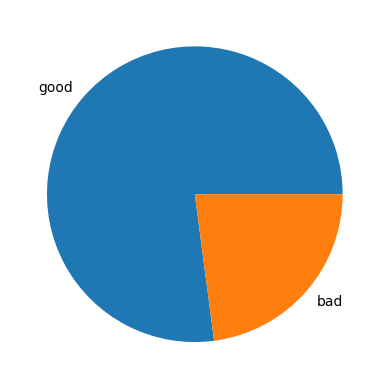

In [68]:
plt.pie(np.array([y_train.value_counts()[1], y_train.value_counts()[0]]), labels=['good', 'bad'])

### Handle imbalanced dataset

In [69]:
!pip install imbalanced-learn

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(11652, 2893) (11652,)


In [71]:
y_train_smote.value_counts()

Label
1    5826
0    5826
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x227d3237890>,
 [Text(6.735557395310444e-17, 1.1, 'good'),
  Text(-2.0206672185931328e-16, -1.1, 'bad')])

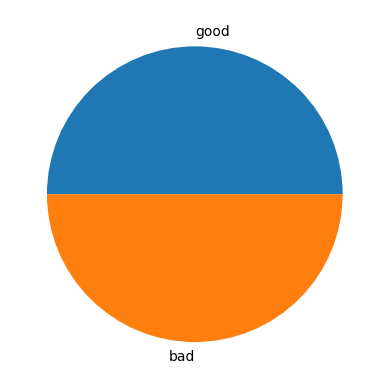

In [72]:
plt.pie(np.array([y_train_smote.value_counts()[1], y_train_smote.value_counts()[0]]), labels=['good', 'bad'])

In [73]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.9080973, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [74]:
y_train_smote

0        1
1        1
2        0
3        1
4        1
        ..
11647    0
11648    0
11649    0
11650    0
11651    0
Name: Label, Length: 11652, dtype: int64

In [75]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
y_test

9164    1
469     1
1550    1
435     0
6010    1
       ..
1332    1
3380    1
1778    1
9656    1
9873    1
Name: Label, Length: 1890, dtype: int64

## Model Training and Evaluation

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


### Logistic Regression

In [82]:
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr.fit(vectorized_x_train_smote, y_train_smote)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [83]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [84]:
y_train_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
y_train_smote

0        1
1        1
2        0
3        1
4        1
        ..
11647    0
11648    0
11649    0
11650    0
11651    0
Name: Label, Length: 11652, dtype: int64

In [86]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [87]:
y_test_pred = lr.predict(vectorized_x_test)

In [88]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
y_test

9164    1
469     1
1550    1
435     0
6010    1
       ..
1332    1
3380    1
1778    1
9656    1
9873    1
Name: Label, Length: 1890, dtype: int64

In [90]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.8
	Precision = 0.871
	Recall = 0.858
	F1-Score = 0.864


### Logistic Regression

In [93]:
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.8
	Precision = 0.871
	Recall = 0.858
	F1-Score = 0.864


### Multinobial Naive Bayes

In [94]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.888
	Precision = 0.897
	Recall = 0.877
	F1-Score = 0.887
Testing Scores:
	Accuracy = 0.825
	Precision = 0.903
	Recall = 0.858
	F1-Score = 0.88


### Decision Tree

In [95]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.739
	Precision = 0.811
	Recall = 0.846
	F1-Score = 0.828


### Random Forest

In [96]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.786
	Precision = 0.781
	Recall = 0.989
	F1-Score = 0.873


### Support Vector Machine

In [97]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.989
	Precision = 0.991
	Recall = 0.987
	F1-Score = 0.989
Testing Scores:
	Accuracy = 0.832
	Precision = 0.853
	Recall = 0.935
	F1-Score = 0.892


In [98]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)